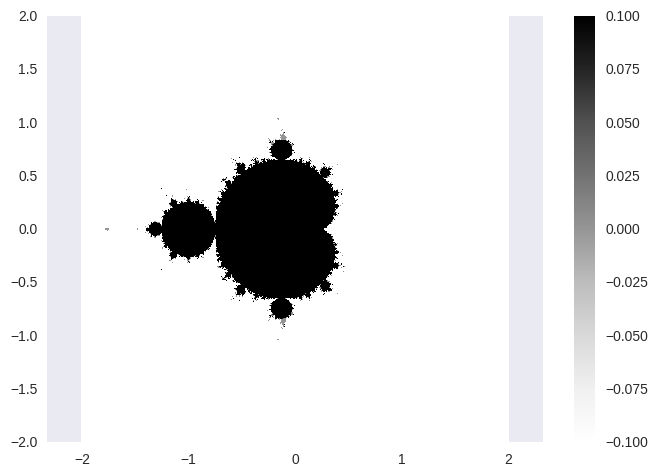

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

N, M = 50, 500

def mandel(X, Y):
    a, b = [0] * 2
    for i in range(N):
        a, b = a**2 - b**2 + X, 2 * a * b + Y
    return (a**2 + b**2)**-100
        
x, y = [np.linspace(-2, 2, M)] * 2
X, Y = np.meshgrid(x, y)
plt.pcolor(X, Y, mandel(X, Y))
plt.colorbar()
plt.axis("equal")
plt.show()

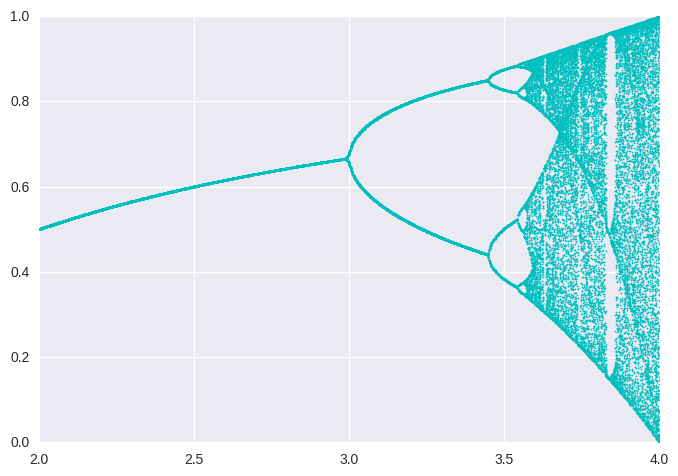

In [3]:
def logistic(a):
    x = [0.8]
    for i in range(400):
        x.append(a * x[-1] * (1 - x[-1]))
    return x[-100:]

for a in np.linspace(2.0, 4.0, 1000):
    x = logistic(a)
    plt.plot([a]*len(x), x, "c.", markersize=2.5)

plt.show()

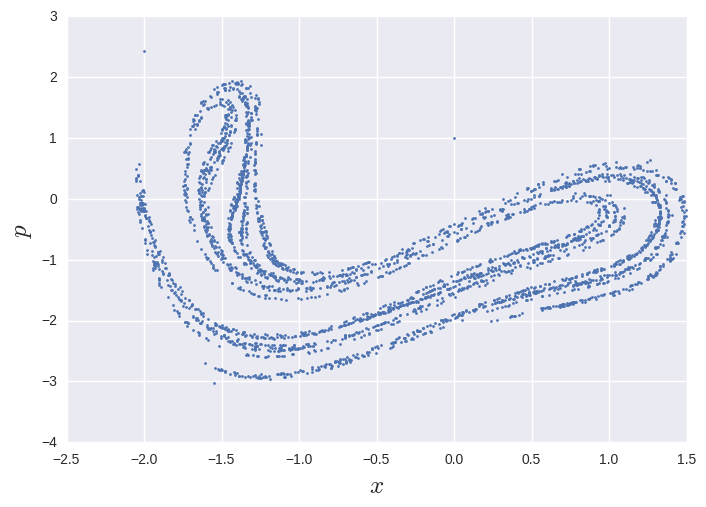

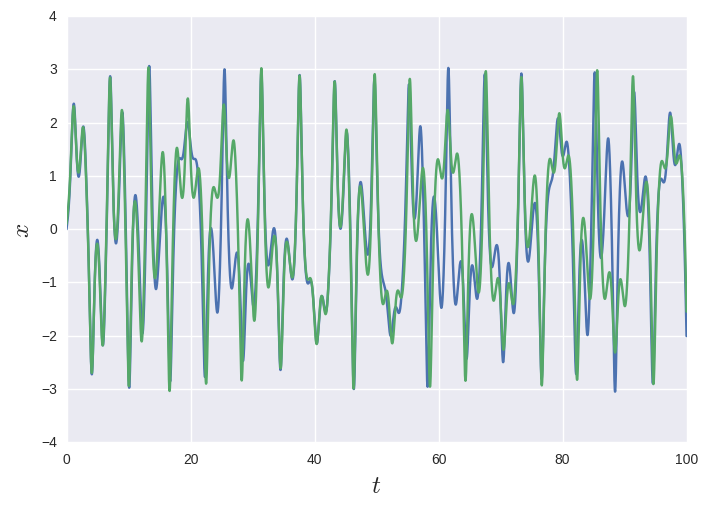

In [5]:
import numpy as np
from scipy.integrate import odeint, simps
import matplotlib.pyplot as plt
import seaborn as sbn


def duffing(var, t, gamma, a, b, F0, omega, delta):
    """
    var = [x, p]
    dx/dt = p
    dp/dt = -gamma*p + 2*a*x - 4*b*x**3 + F0*cos(omega*t + delta)
    """
    x_dot = var[1]
    p_dot = -gamma * var[1] + 2 * a * var[0] - 4 * b * var[0]**3 + F0 * np.cos(omega * t + delta)

    return np.array([x_dot, p_dot])

# parameter
F0, gamma, omega, delta = 10, 0.1, np.pi/3, 1.5*np.pi
a, b = 1/4, 1/2
var, var_lin = [[0, 1]] * 2

#timescale
t = np.arange(0, 20000, 2*np.pi/omega)
t_lin = np.linspace(0, 100, 10000)

# solve
var = odeint(duffing, var, t, args=(gamma, a, b, F0, omega, delta))
var_lin = odeint(duffing, var_lin, t_lin, args=(gamma, a, b, F0, omega, delta))

x, p = var.T[0], var.T[1]
x_lin, p_lin = var_lin.T[0], var_lin.T[1]

plt.plot(x, p, ".", markersize=4)
plt.xlabel(r"$x$", fontsize=18)
plt.ylabel(r"$p$", fontsize=18)
plt.show()

# is chaotic?
plt.plot(t_lin, x_lin)
var_lin = odeint(duffing, [0.1, 1], t_lin, args=(gamma, a, b, F0, omega, delta))
x_lin, p_lin = var_lin.T[0], var_lin.T[1]
plt.plot(t_lin, x_lin)
plt.xlabel(r"$t$", fontsize=18)
plt.ylabel(r"$x$", fontsize=18)
plt.show()